In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read in all the words
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [5]:
len(words)

32033

In [6]:
# build the vocabulary of characters and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0;
itos = {i:s for s, i in stoi.items()}

In [7]:
#build the dataset
block_size = 3
X , Y = [], []
for w in words:
#     print(w)
    context = [0]*block_size
#     print(context , "context")
    for ch in w + '.':
#         print(ch , "ch")
        ix = stoi[ch]
#         print(ix , "ix")
        X.append(context)
        Y.append(ix)
#         print(''.join(itos[i] for i in context) , '----->', itos[ix])
        context = context[1:] + [ix] # crop and append
X = torch.tensor(X)
Y = torch.tensor(Y)

In [8]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [9]:
# Build the dataset
def build_dataset(words):
    block_size = 3
    X , Y = [], []
    for w in words:
#     print(w)
      context = [0] * block_size
      for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #         print(''.join(itos[i] for i in context) , '----->', itos[ix])
        context = context[1:] + [ix] # crop and append
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [10]:
X.shape, X.dtype, Y.shape , Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [11]:
Y

tensor([ 5, 13, 13,  ..., 26, 24,  0])

In [12]:
C = torch.randn((27,2))

In [13]:
emb = C[X]

In [14]:
C[5]

tensor([ 0.1001, -0.1074])

In [15]:
emb[:,1,:]

tensor([[ 0.6369,  0.1605],
        [ 0.6369,  0.1605],
        [ 0.1001, -0.1074],
        ...,
        [ 1.1705, -1.6457],
        [-0.8750,  0.4232],
        [ 1.1705, -1.6457]])

In [16]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [17]:
torch.cat([emb[:,0,:] , emb[:,1,:] , emb[:,2,:]],1)

tensor([[ 0.6369,  0.1605,  0.6369,  0.1605,  0.6369,  0.1605],
        [ 0.6369,  0.1605,  0.6369,  0.1605,  0.1001, -0.1074],
        [ 0.6369,  0.1605,  0.1001, -0.1074, -1.3768,  1.3726],
        ...,
        [ 1.1705, -1.6457,  1.1705, -1.6457, -0.8750,  0.4232],
        [ 1.1705, -1.6457, -0.8750,  0.4232,  1.1705, -1.6457],
        [-0.8750,  0.4232,  1.1705, -1.6457,  0.4130,  1.3055]])

In [18]:
h = torch.tanh(emb.view(-1,6)@ W1 + b1)

In [19]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [20]:
logits = h@ W2+b2

In [21]:
logits.shape

torch.Size([228146, 27])

In [22]:
counts = logits.exp()

In [23]:
prob = counts/counts.sum(1,keepdims=True)

In [24]:
# prob[30].sum()

In [25]:
# loss = -prob[torch.arange(32), Y].log().mean()

In [26]:
X.shape , Y.shape # dataset

(torch.Size([228146, 3]), torch.Size([228146]))

In [27]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27,10), generator = g)
W1 = torch.randn((30,200), generator = g)
b1 = torch.randn(200, generator = g)
W2 = torch.randn((200 , 27) , generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C , W1 , b1 , W2 , b2]

In [29]:
sum(p.nelement() for p in parameters)

11897

In [30]:
for p in parameters:
    p.requires_grad = True

In [31]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [32]:
lri = []
lossi = [] 
stepi = []

In [30]:
torch.randint(0,Xtr.shape[0],(32,)).shape

torch.Size([32])

In [35]:

for i in range(200000):
    # minibatch
    ix = torch.randint(0,Xtr.shape[0],(32,))
    # Forward pass
    emb = C[Xtr[ix]] # (32 , 3 , 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32,100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits,Ytr[ix])
#     print(loss.item())
    # counts = logits.exp()
    # prob = counts/counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32), Y].log().mean()

    #Backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr*p.grad
    # track stats
    lossi.append(loss.item())
    stepi.append(i)

In [36]:
emb = C[Xtr] # (32 , 3 , 2)
h = torch.tanh(emb.view(-1,30)@ W1 + b1) # (32,100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits,Ytr)
print(loss.item())

2.1281018257141113


In [37]:
emb = C[Xdev] # (32 , 3 , 2)
h = torch.tanh(emb.view(-1,30)@ W1 + b1) # (32,100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits,Ydev)
print(loss.item())

2.170710563659668


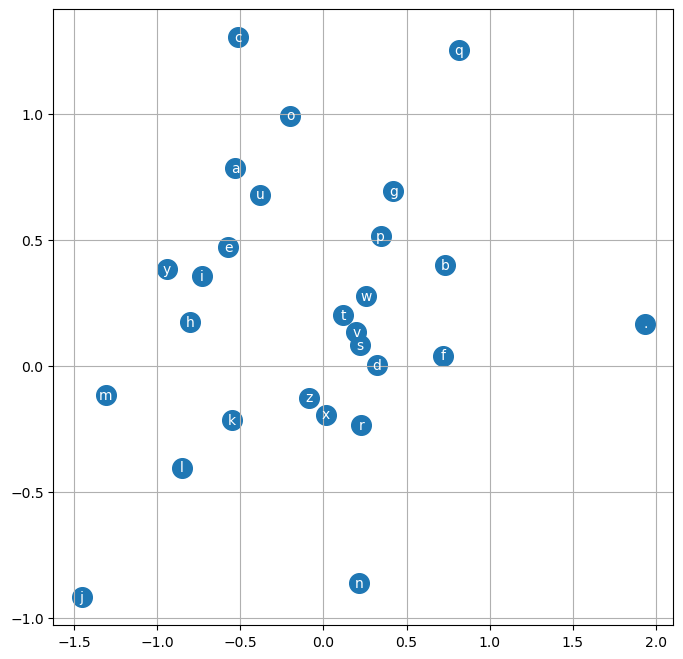

In [38]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [39]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [45]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1,block_size,d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print(''.join(itos[i] for i in out))


eriah.
myah.
seer.
nihayah.
reverston.
raeg.
adelyn.
eliigh.
porealeigh.
estanar.
kayzion.
kalin.
sher.
rishiriel.
kinleenelipenteron.
ubelled.
ryyah.
fael.
yuma.
myston.
